read this: https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/

read this: https://en.wikipedia.org/wiki/Gradient_boosting

### `All the steps of Gradient Boosting Algorithm:`
    
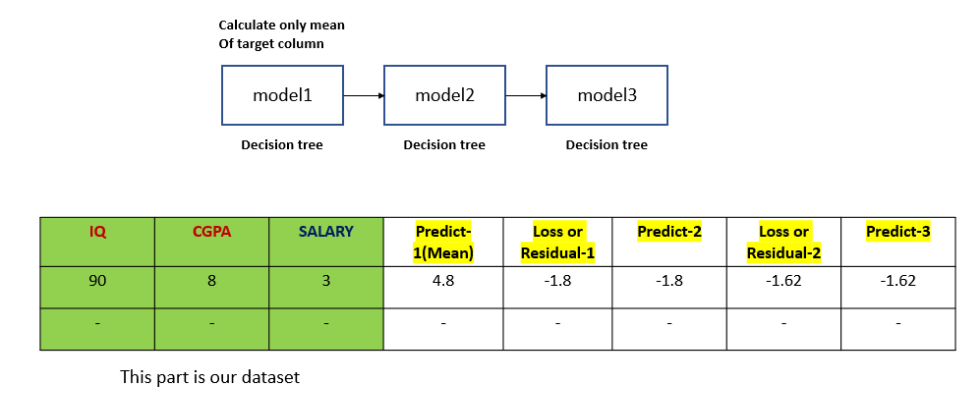

1) At first the model-1 only contain the Mean value of our target column. For here it is Salary column.


2) Then, we will calculate the Loss or residual value using formula, `Loss or res = (Actual_value - Predicted_value)`.
   For this data, let's our residual-1 = (Salary - Predict-1).
   

3) After that, we will train our model-2 using the all independent features. In our case IQ & CGPA. And our target column will    be residual or in our case residual-1.


4) Now, we will predict value for test data by our trained model or model-2 in our case and construct
   predict column in our case predict-2. In our case we used our train data to predict value.
   
   
5) Then we will calculate Loss or residual for our model-2 using this formula:
   `residual = {Actual - (model-1 + learning_rate * model-2)}`.
   in our case `residual-2 = Actual - {predict-1 + learning_rate * predict-2}`
   or `residual-2 = 3 - {4.8 + 0.1*(-1.8)}`
   

6) Now, we will train our next model in our case model-3 following the step-3 and predict following the step-4. In our case we will predict-3. And this process will be continuoue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor

## I created a toy dataset

In [2]:
dic = {
    "iq": [90, 100, 110, 120, 80],
    "cgpa": [8, 7, 6, 9, 5],
    "salary": [3, 4, 8, 6, 3]
}

df = pd.DataFrame(data=dic)

df

,iq,cgpa,salary
0,90,8,3
1,100,7,4
2,110,6,8
3,120,9,6
4,80,5,3


### Model1: Base Model that holds the mean values of target column

In [3]:
# create base model -- mean

df['pred_model1(mean)'] = df['salary'].mean()

df

,iq,cgpa,salary,pred_model1(mean)
0,90,8,3,4.8
1,100,7,4,4.8
2,110,6,8,4.8
3,120,9,6,4.8
4,80,5,3,4.8


### Find the Peseudo Residuals: (actual - predicted)

In [4]:
# Find loss or pseudo residuals

df["loss1"] = df["salary"] - df["pred_model1(mean)"]

df

,iq,cgpa,salary,pred_model1(mean),loss1
0,90,8,3,4.8,-1.8
1,100,7,4,4.8,-0.8
2,110,6,8,4.8,3.2
3,120,9,6,4.8,1.2
4,80,5,3,4.8,-1.8


### Model2: Create our first Decision Tree Model

In [5]:
# Now create our first decision tree model

# Here, I have used max_leaf_nodes=4 because of our data is less

tree_model = DecisionTreeRegressor(max_leaf_nodes=4)

In [6]:
# demo test

df[['iq','cgpa']].values

array([[ 90,   8],
       [100,   7],
       [110,   6],
       [120,   9],
       [ 80,   5]], dtype=int64)

In [7]:
# demo test

df['loss1'].values

array([-1.8, -0.8,  3.2,  1.2, -1.8])

### Train our Model2

In [8]:
# Now, I have trained my tree_model using independent columns and loss or residual column

tree_model.fit(X=df[['iq', 'cgpa']].values, y=df['loss1'].values)

DecisionTreeRegressor(max_leaf_nodes=4)

### Plot the decision tree for model2

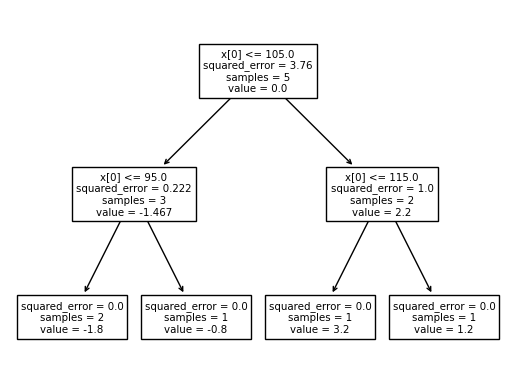

In [9]:
plot_tree(decision_tree=tree_model)

plt.show()

### Predict values using only Model two that is `tree_model`

In [10]:
# this is just prediction for every rows

# this is the prediction only for our first decision tree or for our tree_model

# Here, I used same data to test that I have used in my training session

# note: If you want to predict salary using this model you can't. Because we train this model using the residual or loss
# values as a target column. So, this model only predict the residual values

tree_model_prediction = tree_model.predict(X=df[['iq', 'cgpa']].values)

tree_model_prediction

array([-1.8, -0.8,  3.2,  1.2, -1.8])

### Add prediction by model2 values in dataframe as a new column

In [11]:
df["prediction(m2_or_tree_model)"] = tree_model_prediction

df

,iq,cgpa,salary,pred_model1(mean),loss1,prediction(m2_or_tree_model)
0,90,8,3,4.8,-1.8,-1.8
1,100,7,4,4.8,-0.8,-0.8
2,110,6,8,4.8,3.2,3.2
3,120,9,6,4.8,1.2,1.2
4,80,5,3,4.8,-1.8,-1.8


In [12]:
# Demo test

4.8 + (0.1 * tree_model_prediction)

array([4.62, 4.72, 5.12, 4.92, 4.62])

### Prediction Salary upto using Model-1 + model-2

In [13]:
# model1(pred_model1(mean)) + model2(tree_model)

# If anyone want to know the prediction upto model-2 then this is the formula:

# Formula: model1_prediction + (learning_rate * model2_prediction)

# learning rate range: 0 to 1

# Here, learning rate used to reduce the overfit condition

# Note: Using this formula you can predict the salary upto model2

y_pred = 4.8 + (0.1 * tree_model_prediction)

y_pred

array([4.62, 4.72, 5.12, 4.92, 4.62])

### Add a new column in the df that contains predicated values that are predicted by our model-1 and model-2

In [14]:
df["pred_m1+m2"] = y_pred

df

,iq,cgpa,salary,pred_model1(mean),loss1,prediction(m2_or_tree_model),pred_m1+m2
0,90,8,3,4.8,-1.8,-1.8,4.62
1,100,7,4,4.8,-0.8,-0.8,4.72
2,110,6,8,4.8,3.2,3.2,5.12
3,120,9,6,4.8,1.2,1.2,4.92
4,80,5,3,4.8,-1.8,-1.8,4.62


### Now again Find the Peseudo Residuals or loss for model2: (actual - predicted)

In [15]:
# Now I will calculate loss for model2 or tree_model

# y_pred = model1_prediction + (learning_rate * model2_prediction)

# y_pred = 4.8 + (0.1 * model2_prediction)

# Formula: loss2 = actual - y_pred

df["loss2"] = df["salary"] - y_pred

df

,iq,cgpa,salary,pred_model1(mean),loss1,prediction(m2_or_tree_model),pred_m1+m2,loss2
0,90,8,3,4.8,-1.8,-1.8,4.62,-1.62
1,100,7,4,4.8,-0.8,-0.8,4.72,-0.72
2,110,6,8,4.8,3.2,3.2,5.12,2.88
3,120,9,6,4.8,1.2,1.2,4.92,1.08
4,80,5,3,4.8,-1.8,-1.8,4.62,-1.62


### Model3: Let's Create second decision tree

In [16]:
# Let's create our model3 or second decision tree

# Here, I take max_leaf_nodes=4 because our data is less

tree_model2 = DecisionTreeRegressor(max_leaf_nodes=4)

### Train model3 or second decision

In [17]:
# Now train our model

tree_model2.fit(X=df[["iq", "cgpa"]].values, y=df["loss2"].values)

DecisionTreeRegressor(max_leaf_nodes=4)

### Plot the decision tree for model3 or second decision tree

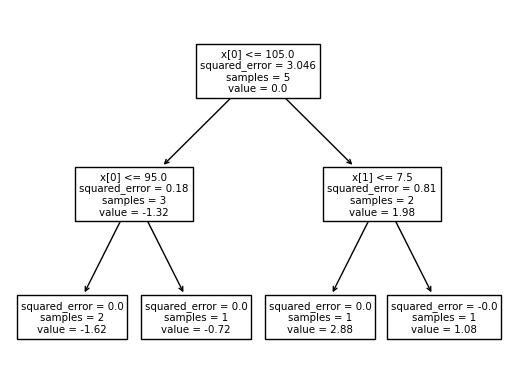

In [18]:
# let's plot the model

plot_tree(decision_tree=tree_model2)

plt.show()

### Predict values using only Model3 that is `tree_model2`

In [19]:
# this is just prediction for every rows

# this is the prediction only for our second decision tree or for our tree_model2

tree_model2_prediction = tree_model2.predict(X=df[['iq', 'cgpa']].values)

tree_model2_prediction

array([-1.62, -0.72,  2.88,  1.08, -1.62])

### Add prediction by model3 values in dataframe as a new column

In [20]:
df["prediction(m3_or_tree_model2)"] = tree_model2_prediction

df

,iq,cgpa,salary,pred_model1(mean),loss1,prediction(m2_or_tree_model),pred_m1+m2,loss2,prediction(m3_or_tree_model2)
0,90,8,3,4.8,-1.8,-1.8,4.62,-1.62,-1.62
1,100,7,4,4.8,-0.8,-0.8,4.72,-0.72,-0.72
2,110,6,8,4.8,3.2,3.2,5.12,2.88,2.88
3,120,9,6,4.8,1.2,1.2,4.92,1.08,1.08
4,80,5,3,4.8,-1.8,-1.8,4.62,-1.62,-1.62


### Prediction Salary upto using Model-1 + model-2 + model-3

In [21]:
# model1(pred_model1(mean)) + model2(tree_model) + model3(tree_model2)

# If anyone want to know the prediction upto model-3 then this is the formula:

# Formula: model1_prediction + (learning_rate * model2_prediction) + (learning_rate * model3_prediction)

# Note: Using this formula you can predict the salary upto model3

y_pred2 = 4.8 + (0.1 * tree_model_prediction) + (0.1 * tree_model2_prediction)

y_pred2

array([4.458, 4.648, 5.408, 5.028, 4.458])

### Add a new column in the df that contains predicated values that are predicted by our model-1 and model-2 and model-3

In [22]:
df["pred_m1+m2+m3"] = y_pred2

df

,iq,cgpa,salary,pred_model1(mean),loss1,prediction(m2_or_tree_model),pred_m1+m2,loss2,prediction(m3_or_tree_model2),pred_m1+m2+m3
0,90,8,3,4.8,-1.8,-1.8,4.62,-1.62,-1.62,4.458
1,100,7,4,4.8,-0.8,-0.8,4.72,-0.72,-0.72,4.648
2,110,6,8,4.8,3.2,3.2,5.12,2.88,2.88,5.408
3,120,9,6,4.8,1.2,1.2,4.92,1.08,1.08,5.028
4,80,5,3,4.8,-1.8,-1.8,4.62,-1.62,-1.62,4.458


### Now again Find the Peseudo Residuals or loss for model3: (actual - predicted)

In [23]:
# Now I will calculate loss for model3 or tree_model2

# y_pred2 = model1_prediction + (learning_rate * model2_prediction) + (learning_rate * model3_prediction)

# y_pred2 = 4.8 + (0.1 * model2_prediction) + (0.1 * model3_prediction)

# Formula: loss3 = actual - y_pred2

df["loss3"] = df["salary"] - y_pred2

df

,iq,cgpa,salary,pred_model1(mean),loss1,prediction(m2_or_tree_model),pred_m1+m2,loss2,prediction(m3_or_tree_model2),pred_m1+m2+m3,loss3
0,90,8,3,4.8,-1.8,-1.8,4.62,-1.62,-1.62,4.458,-1.458
1,100,7,4,4.8,-0.8,-0.8,4.72,-0.72,-0.72,4.648,-0.648
2,110,6,8,4.8,3.2,3.2,5.12,2.88,2.88,5.408,2.592
3,120,9,6,4.8,1.2,1.2,4.92,1.08,1.08,5.028,0.972
4,80,5,3,4.8,-1.8,-1.8,4.62,-1.62,-1.62,4.458,-1.458


### Model4: Let's create 3rd decision tree

In [24]:
# Let's create our model4 or third decision tree

# Here, I take max_leaf_nodes=4 because our data is less

tree_model3 = DecisionTreeRegressor(max_leaf_nodes=4)

### Train model4 or 3rd decision tree

In [25]:
# Now train our model

tree_model3.fit(X=df[["iq", "cgpa"]].values, y=df["loss3"].values)

DecisionTreeRegressor(max_leaf_nodes=4)

### Plot model4 or 3rd decision tree

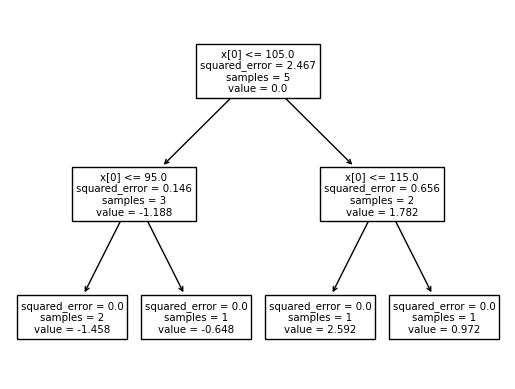

In [26]:
# let's plot the model

plot_tree(decision_tree=tree_model3)

plt.show()

### Predict values using only Model4 that is `tree_model3`

In [27]:
# this is just prediction for every rows

# this is the prediction only for our model4 or for our tree_model3

tree_model3_prediction = tree_model3.predict(X=df[['iq', 'cgpa']].values)

tree_model3_prediction

array([-1.458, -0.648,  2.592,  0.972, -1.458])

### Add prediction by model4 values in dataframe as a new column

In [28]:
df["prediction(m4_or_tree_model3)"] = tree_model3_prediction

df

,iq,cgpa,salary,pred_model1(mean),loss1,prediction(m2_or_tree_model),pred_m1+m2,loss2,prediction(m3_or_tree_model2),pred_m1+m2+m3,loss3,prediction(m4_or_tree_model3)
0,90,8,3,4.8,-1.8,-1.8,4.62,-1.62,-1.62,4.458,-1.458,-1.458
1,100,7,4,4.8,-0.8,-0.8,4.72,-0.72,-0.72,4.648,-0.648,-0.648
2,110,6,8,4.8,3.2,3.2,5.12,2.88,2.88,5.408,2.592,2.592
3,120,9,6,4.8,1.2,1.2,4.92,1.08,1.08,5.028,0.972,0.972
4,80,5,3,4.8,-1.8,-1.8,4.62,-1.62,-1.62,4.458,-1.458,-1.458


### Prediction Salary upto using Model-1 + model-2 + model-3 + model-4

In [29]:
# model1(pred_model1(mean)) + model2(y_pred) + model3(y_pred2) + model4(tree_model3)

# If anyone want to know the prediction upto model-4 then this is the formula:

# Formula: model1_prediction + (learning_rate * model2_prediction) +
#          (learning_rate * model3_prediction) + (learning_rate * model4_prediction)


y_pred3 = 4.8 + (0.1 * tree_model_prediction) + (0.1 * tree_model2_prediction) + (0.1 * tree_model3_prediction)

y_pred3

array([4.3122, 4.5832, 5.6672, 5.1252, 4.3122])